# Chapter 4
## Autoencoder



    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).
    
Learning goals:
1. Derive and implement the mean-squared-error loss function and the rectified linear activation function
1. Implement an autoencoder as a neural network with unsupervised learning
1. Check what face features the autoencoder has learned to encode in the hidden units

### Notes on the architecture

The autoencoder network that you are about to implement has the same structure as in the MLP exercise: The input, hidden, and output node layers are connected with two weight layers. This time, the $n_h$ hidden layer nodes use a *rectified linear* activation function, and the output units use *linear* activations. 

The data set is the Yale Face Database, which is a small set of grayscale photos of faces, each showing a different facial expression. The autoencoder will have as many input and output units as there are pixels. The hidden layer has far less units, as our goal is to learn a compressed representation of faces. The autoencoders job is "learning to reconstruct", that is, learning to reconstruct the face at the input units in the output units, after passing the information through the hidden units. Basically this means that `X` and `Y` are equal here. 

### Exercise 1: Mean squared error (1 point)

As we want to predict pixel values we have a regression problem, and MSE is a convenient loss function for regression problems. MSE is large when the prediction is off, and near zero when the prediction is most similar to the target. The mean squared error (MSE) is given by:
$$L = \frac{1}{2N} \sum^N (t^{(n)} - y^{(n)})^2$$
Here, $t^{(n)}$ is the target vector, and $y^{(n)}$ the prediction of the $n$th example. 

We need the derivative of the MSE with respect to $y$ to do gradient descent (i.e., backpropagation) to tweak the parameters (i.e., the weights) for regression. Derive the MSE with respect to $y$, i.e. derive $\frac{\partial L}{\partial y}$. You can ignore the batch index $n$ ($N = 1$).

### Solution 1:
With N=1: 

$L = \frac{1}{2} * (t-y)^2\\
\frac{\partial L}{\partial y} = \frac{d}{dy}\lbrack \frac{1}{2} * (t-y)^2 \rbrack\\
\frac{1}{2} * 2 * (t-y) * \frac{d}{dy} (t-y)\\
= (t-y) * -1\\
=y-t
$

### Exercise 2: The rectified linear unit activation function (ReLU) (1 point)
The rectified linear activation function is given by:
$$f(a) = max(0, a)$$

Obtain its derivative $\frac{\partial f}{\partial a}$. 

Hint: It is a simple conditional expression (two cases).

### Solution 2:

\begin{eqnarray*}
\frac{\partial f}{\partial a} &=& 
\begin{cases}
    1, & \text{if } a > 0 \\
    0, & \text{otherwise}
\end{cases}
\end{eqnarray*}


### Exercise 3: The forward pass (1 point)
The network is defined as having two layers $w_1$ and $w_2$, where $w_1$ connects the input $x$ with the hidden layer $h$, and $w_2$ connects the hidden layer $h$ with the output layer $y$. For the hidden layer, we use rectified linear units with the activation function $f(a) = max(0, a)$. The output layer is just a linear layer (with the linear activation function $g(a) = a$). Write down the expressions for $a_1$, $h$, $a_2$, and $y$, where $a_1$ and $a_2$ are the activities of the hidden and output layer before passing them through the rectified linear and linear activations, respectively.

### Solution 3:
Write $\LaTeX$ here.

\begin{eqnarray*}
a_1 &=& w_1 * x \\
h &=& f(a_1) = max(0,a) \\
a_2 &=& w_2 * h \\
y &=& g(a_2) = a_2
\end{eqnarray*}

### Exercise 4: Gradient of the last layer (1 point)
To compute the partial derivatives on the weights $w_2$ of the last layer, we have to propagate from the error function back through the non-linearity to the weights. Derive the chain of partial derivatives to compute $\frac{\partial L}{\partial w_2}$.

### Solution 4
$ \frac{\partial L}{\partial y} = y-t \\
\frac{\partial y}{\partial w_2} = \frac{\partial a_2}{\partial w_2} = h \\
\frac{\partial L}{\partial w_2} = h*(y-t) = hy-ht\\
$

### Exercise 5: Gradient of the first layer (1 point)
To compute the partial derivatives on the weights $w_1$ of the first layer, we have to propagate the error even further down the network. Derive the chain of partial derivatives to compute $\frac{\partial L}{\partial w_1}$.

Due to the 4 intermediate variables $y$, $a_2$, $h$ and $a_1$ the chain rule product will have 5 terms. Due do the derivative of the rectified linear activation, which is a conditional expression; you will end up with a conditional expression here too:

\begin{eqnarray*}
\frac{\partial L}{\partial w_1} &=& 
\begin{cases}
    ?, & \text{if } a_1 > 0 \\
    ?, & \text{otherwise}
\end{cases}
\end{eqnarray*}

### Solution 5
$\frac{\partial L}{\partial w_1} = \\
\frac{\partial L}{\partial y} * \frac{\partial y}{\partial a_2} * \frac{\partial a_2}{\partial h} 
* \frac{\partial h}{\partial a_1} * \frac{\partial a_1}{\partial w_1}\\
= (y-t) * 1 * w_2 * \frac{\partial h}{\partial a_1}  * x \\
$

\begin{eqnarray*}
 &=& 
\begin{cases}
     (y-t) * w_2 * x  & \text{if } a_1 > 0 \\
    0 & \text{otherwise}
\end{cases}
\end{eqnarray*}


### Exercise 6: Implementation (2.5 points)
Now we can start implementing the autoencoder. Write the following functions:
1. `mean_squared_error(Y, X)`: Computes the mean squared error. You need to sum over the pixel axis 0, and then mean  the result over the examples.
1. `relu(A)`: Passes the activity `A` through the rectified linear unit. Use [`np.maximum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html) to compare each element of A to 0.
1. `linear(X, W)`: Computes the activities `A` as `X` weighted by `W`. Just like in the previous exercises. 
1. `forward(X, W1, W2)`: Computes the forward pass for the two-layer AE with the `relu(A)` function at the hidden units. As the linear activation is just the trivial identity there is no activation function at the output units. Returns `A1`, `H` and `Y`. 
1. `backward(X, A1, H, Y, W2)`: Computes the backward pass for the two-layer AE with ReLU hidden units and MSE. The conditional can be realized by multiplying with the boolean matrix `(A1 > 0)`. 
1. `train_network(X_train, X_val,n_hidden, n_epochs, eta)`: Implement the training procedure (learn the weights). See the skeleton code for some help. Note that we have supplied a `initialize_weights(n_in, n_out)` function to initialize weights in the range from the MLP assignment. Remember that the input is equal to the output, so we do not need anything but `X_train` for training. 

Feel free to copy some code from the previous exercises.

### Solution 6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [2]:
def initialize_weights(n_in, n_out):
    """
    Initializes a weight matrix.
    INPUT:
        n_in  = [int] number of input units.
        n_out = [int] number of output units
    OUTPUTS
        W = [n_out n_in] the initial weight matrix
    """
    r = np.sqrt(6) / np.sqrt(n_out + n_in)
    return np.random.uniform(-r, r, [n_out, n_in])

In [3]:
def mean_squared_error(Y, X):
    """
    Computes the mean squared error.
    INPUT:
        Y = [P N] output vector for N examples of length P
        X = [P N] target vector for N examples of length P
    OUTPUTS
        L = [flt] the MSE
    """
    ## Write code here ##
    L = (1.0/(2*(Y.shape[1]))) * np.sum((Y-X)**2)
    return L
# Y = np.array([[1,1,1],[1,1,1]])
# X = np.array([[0,0,0],[0,0,1]])
# print(mean_squared_error(Y,X))

In [4]:
def relu(A):
    """
    Computes the rectified linear activation.
    INPUT:
        A = [K N] activity matrix of K units for N examples
    OUTPUT
        Y = [K N] output matrix of K units for N examples
    """
    return np.maximum(0,A)
A = np.array([[1,1,1],[1,0,1]])
print(relu(A))

[[1 1 1]
 [1 0 1]]


In [5]:
def linear(X, W):
    """
    Computes the activities for a fully connected layer.
    INPUT:
        X = [P N] data matrix of P input units for N examples
        W = [Q P] weight matrix of P inputs to Q outputs
    OUTPUT
        A = [Q N] activity matrix of Q output units for N examples
    """
    A = np.dot(W,X)
    return A

In [6]:
def forward(X, W1, W2):
    """
    Computes the forward pass for a two-layer AE with relu hidden units.
    INPUT
        X  = [P N] data matrix of P inputs for N examples
        W1 = [Q P] weight matrix of the first layer from P input pixels to Q outputs
        W2 = [P Q] weight vector of the second layer of Q inputs to P output pixels
    OUTPUT
        A1 = [Q N] linear activations going into the hidden unit activation functions for P pixels and N examples
        H  = [Q N] output matrix of Q hidden units for N examples
        Y  = [P N] output pixel vectors (reconstructions) for N examples
    """    
    ## Write code here ##
    A1 = linear(X,W1)
    H = relu(A1)
    Y = linear(H, W2)
    return A1, H, Y

In [7]:
def backward(X, A1, H, Y, W2):
    """
    Computes the backward pass for a two-layer network with sigmoid and softmax units, and cross-entropy loss.  
    INPUT:
        X  = [P N] data matrix of P inputs for N examples
        H  = [Q N] output matrix of Q hidden units for N examples
        A1 = [Q N] linear activation
        Y  = [P N] output pixel vectors of length P for N examples
        W2 = [P Q] weight vector of the second layer of Q inputs to P outputs
    OUTPUT
        dW1 = [Q P] gradient matrix for the weights of layer 1 of P inputs to Q outputs
        dW2 = [P Q] gradient matrix for the weights of layer 2 of Q inputs to P outputs
    """

    ## Write code here ##
    delta2 = Y-X
    dW2 = np.dot(delta2, H.T)
    
    delta1 = np.dot(W2.T, Y-X) * (A1 > 0)
    dW1 = np.dot(delta1, X.T)
    return dW1, dW2

In [26]:
def train_network(X_train, X_val, n_hidden=30, n_epochs=2000, eta=10**-5):
    """
    Performs the training procedure for a two-layer MLP with ReLU hidden units and MSE.
    INPUT:
        X_train  = [P N] training data matrix of P inputs for N training examples
        X_val    = [P N] validation data matrix of P inputs for N training examples
        n_hidden = [int] number of hidden units (default 30)
        n_epochs = [int] number of training epochs (default 2000)
        eta      = [flt] learning rate (default 10^-5)
    OUTPUT:
        W1         = [Q P] the learned weights for layer 1 of P inputs to Q outputs
        W2         = [P Q] the learned weights for layer 2 of Q inputs to P output pixels
        train_loss = [Z 1] the training loss for Z epochs
        val_loss   = [Z 1] the validation loss for Z epochs
    """
    
    # Initialize W1 and W2 (use initialize_weights())
    W1 = initialize_weights(X_train.shape[0], n_hidden)
    W2 = initialize_weights(n_hidden, X_train.shape[0])
    # Loop over epochs
    train_loss = np.zeros((n_epochs))
    val_loss = np.zeros((n_epochs))
    for i_epoch in xrange(n_epochs):
        
        # Forward pass
        A1, H_train, Y_train = forward(X_train, W1, W2)
        # Backward pass
        dW1, dW2 = backward(X_train, A1, H_train, Y_train, W2)
        
        # Parameter update
        W1 = W1 - eta*dW1
        W2 = W2 - eta*dW2
        
        # Save loss
        train_loss[i_epoch] = mean_squared_error(Y_train, X_train)
        _, _, Y_val = forward(X_val, W1, W2)
        val_loss[i_epoch] = mean_squared_error(Y_val, X_val)        
        # Print progress and loss
        if i_epoch % 50 == 0:
            print("Epoch {}/{}. Train loss: {}. Validation loss: {}.".format(
                1+i_epoch, n_epochs, train_loss[i_epoch], val_loss[i_epoch]))
        
    return W1, W2, train_loss, val_loss

### Loading the data

In the next cells we load and prepare the face dataset. We also show example faces from the data set. Then we remove the mean from the data, and divide it by its standard deviation. This process, leading to a data set with zero-mean and unit variance is almost always an important preprocessing step. No information gets lost, but many common machine learning methods expect such *standardized* or *z-transformed* data. 

In [12]:
# Read dataset
maxsz = [32, 32]
X = []
i = 0
for file_name in os.listdir(os.path.join(os.getcwd(), "yalefaces")):
    if file_name[:7] != "subject":
        continue
    im = Image.open(os.path.join(os.getcwd(), "yalefaces", file_name))
    im.thumbnail(maxsz, Image.ANTIALIAS)
    data = np.asarray(im)
    if i == 0:
        sz = data.shape
    X.append(np.ndarray.flatten(data))
    i += 1
X = np.array(X).astype("float32")
X = X.T

# Print dimensions
print("Dimensions of face data set: {}.".format(X.shape))

Dimensions of face data set: (768, 165).


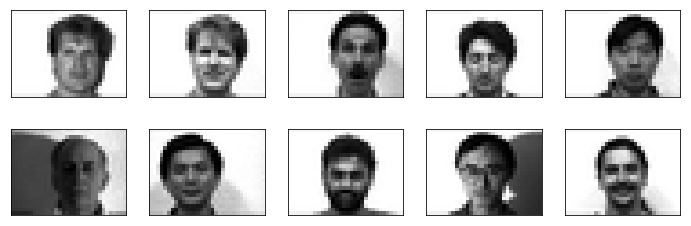

In [13]:
# Plot some examples
fig, ax = plt.subplots(2, 5, figsize=(12, 4))
ax = ax.flatten()
for i_example in range(len(ax)):
    ax[i_example].imshow(X[:, i_example*10].reshape((sz)), cmap="gray")
    ax[i_example].set_xticks([], [])
    ax[i_example].set_yticks([], [])

In [14]:
# Standardise data to zero mean and unit variance. We are doing this manually here as we need 
# mu and sigma to revert this operation (add mu, multiply by sigma) when 
# visualizing the resulting reconstructed faces. 

mu = X.mean(axis=1)
sigma = X.std(axis=1)

X -= np.expand_dims(mu, 1)
X /= np.expand_dims(sigma, 1)

In [15]:
# Split dataset in training, validation, and testing split
X_train = X[:, :100]
X_val = X[:, 100:140]
X_test = X[:, 140:]

# Print dimensions
print("Dimensions training inputs: {}".format(X_train.shape))
print("Dimensions validation inputs: {}".format(X_val.shape))
print("Dimensions testing inputs: {}".format(X_test.shape))

Dimensions training inputs: (768, 100)
Dimensions validation inputs: (768, 40)
Dimensions testing inputs: (768, 25)


### Exercise 7: Running autoencoder training (0.5 points)

Run the autoencoder with $n_h=30$ hidden units, a learning rate $\eta=10^{-5}$ and for 2000 epochs. Plot the obtained training and validation losses again.

### Solution 7

Epoch 1/2000. Train loss: 444.29046366942475. Validation loss: 322.7496284647186.
Epoch 51/2000. Train loss: 214.21954443291852. Validation loss: 247.34806055415999.
Epoch 101/2000. Train loss: 135.69649630995187. Validation loss: 215.95657236500824.
Epoch 151/2000. Train loss: 112.804593985975. Validation loss: 208.0641438433716.
Epoch 201/2000. Train loss: 104.13987043243249. Validation loss: 204.17229001914583.
Epoch 251/2000. Train loss: 95.78902119380142. Validation loss: 199.83347805940898.
Epoch 301/2000. Train loss: 87.03262190742011. Validation loss: 195.0873115330511.
Epoch 351/2000. Train loss: 78.6135894860886. Validation loss: 190.29358246759926.
Epoch 401/2000. Train loss: 70.99322990517926. Validation loss: 185.90978038170107.
Epoch 451/2000. Train loss: 64.5422696203265. Validation loss: 182.28970697937353.
Epoch 501/2000. Train loss: 59.32914356002542. Validation loss: 179.54329958059074.
Epoch 551/2000. Train loss: 55.125676313846384. Validation loss: 177.400569500600

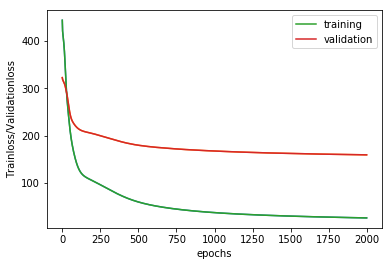

In [18]:
# Train the network
W1, W2, train_loss, val_loss = train_network(X_train,X_val)

# Plot the training and validation losses
x = range(0,2000)
plt.plot(x, train_loss)
plt.plot(x, val_loss)
plt.plot(train_loss, label="training")
plt.plot(val_loss, label="validation")
plt.xlabel("epochs")
plt.ylabel("Trainloss/Validationloss")
plt.legend()
plt.show()

### Exercise 8: Reconstruction (1 point)

Choose 5 faces from the set, and plot their original and their reconstructed image side-by-side. That is, plot a chosen face and the output your trained autoencoder (represented by the weights) creates for it.

Use [`np.reshape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) to reshape pixel values for the input and output images to their original dimensions `sz` in a 2D array. Then make use of [`plt.imshow()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) with a `gray` colormap to show the faces. 

You need to revert the scaling operation by multiplying by `sigma` and adding the `mean` (both previously computed) on each `x` and `y`. (If you don't, your real and reconstructed images will be off, e.g. too dark.)

### Solution 8

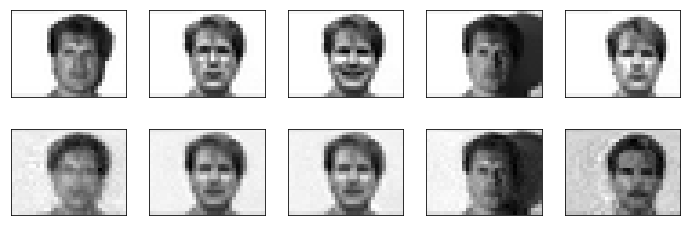

In [24]:
# Open a 5-by-2 figure with plt.subplots
## Write code here ##
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12,4))
ax = ax.flatten()


# Loop over 5
for i_example in range(5):
## Write code here ##

    # Take a new example from X (the autoencoder input)
    ## Write code here ##
    index = np.random.randint(0, X.shape[0])
    X_example = np.copy(X[:, i_example])

    # Forward pass of X through the network, obtain the reconstruction y
    ## Write code here ##
    A1_example, H_example, Y_example = forward(X_example, W1, W2)
    
    # Plot the original X
    ## Write code here ##
    X_example *= sigma
    X_example += mu
    
    ax[i_example].imshow(X_example.reshape((sz)), cmap="gray")
    ax[i_example].set_xticks([], [])
    ax[i_example].set_yticks([], [])
    
    # Plot the reconstructed X (output Y)
    ## Write code here ##
    Y_example *= sigma
    Y_example += mu
    
    ax[i_example+5].imshow(Y_example.reshape((sz)), cmap="gray")
    ax[i_example+5].set_xticks([], [])
    ax[i_example+5].set_yticks([], [])

### Exercise 9: Weights and receptive fields (1 point)
We can visualize what was learned during classification and by the autoencoder. During training, the hidden units have become pattern detectors that you can interpret as *receptive fields*. 

You should visualize both `W1` and `W2`. To visualize the learned pattern of a single unit $i$, use [`np.reshape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) to reshape the weights leading from all image pixels to unit $i$ into a 2D array. Then make use of [`plt.imshow()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) with a `gray` colormap to show the learned pattern.

### Solution 9

W1


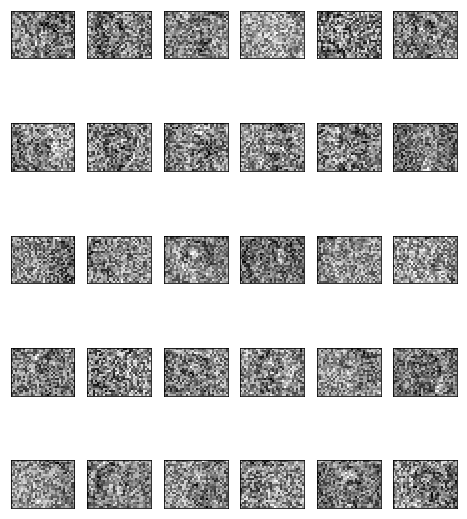

W2


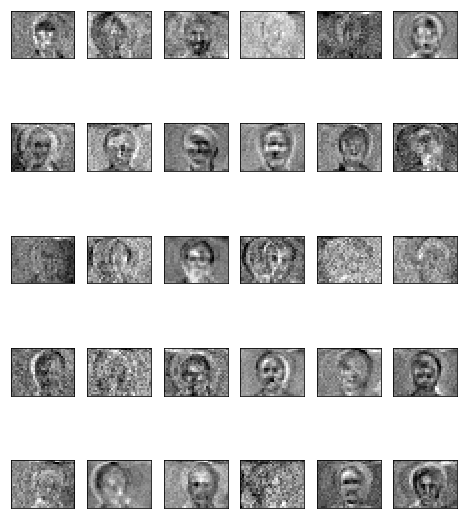

In [25]:
# Visualize W1
print("W1")
nhidden = W1.shape[0]
plt.figure(figsize=([8,10]))
for i in range(nhidden):    
    plt.subplot(5,6,i+1)
    fig = plt.imshow(W1[i, :].reshape(sz), cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()
# # Visualize W2
print("W2")
plt.figure(figsize=([8,10]))
for i in range(nhidden):    
    plt.subplot(5,6,i+1)
    fig = plt.imshow(W2[:, i].reshape(sz), cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()